In [2]:
import pandas as pd 
import math
import numpy as np
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.min_rows = 10

In [3]:
data = pd.read_csv('taxi.csv')
data.head(5)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [4]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


1) Есть странные значения -1 для положения водителя и заказчика. Удалим их. 

2) Также distance_km > 30-50км

3) Также странные поездки с offer_class_group = Test

In [5]:
data = data[data['origin_order_longitude'] != -1]

In [6]:
data = data[data['driver_longitude'] != -1]

In [7]:
data = data[data['distance_km'] < 100]

In [8]:
data = data[data['offer_class_group'] != 'Test']

In [9]:
profile = ProfileReport(data)
profile

/Users/user/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,99665
Total Missing (%),0.0%
Total size in memory,11.4 MiB
Average record size in memory,120.0 B
Numeric,11
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [10]:
# добавм параметр - расстояние до клиента

import mpu

driver_loc = data[['driver_latitude','driver_longitude']]
order_loc = data[['origin_order_latitude','origin_order_longitude']]

In [11]:
t1 = driver_loc.apply(lambda x: (x['driver_latitude'], x['driver_longitude']),axis =1).to_frame()
t2 = order_loc.apply(lambda x: (x['origin_order_latitude'], x['origin_order_longitude']),axis =1).to_frame()


In [12]:
t1.columns = ['coord_dr']
t2.columns = ['coord_or']
t = t1.merge(t2, left_index=True, right_index=True)

In [13]:
# data.drop(['distance_to_user'], axis = 1, inplace=True)
data['distance_to_user'] = t.apply(lambda x: mpu.haversine_distance(x['coord_dr'], x['coord_or']), axis = 1)


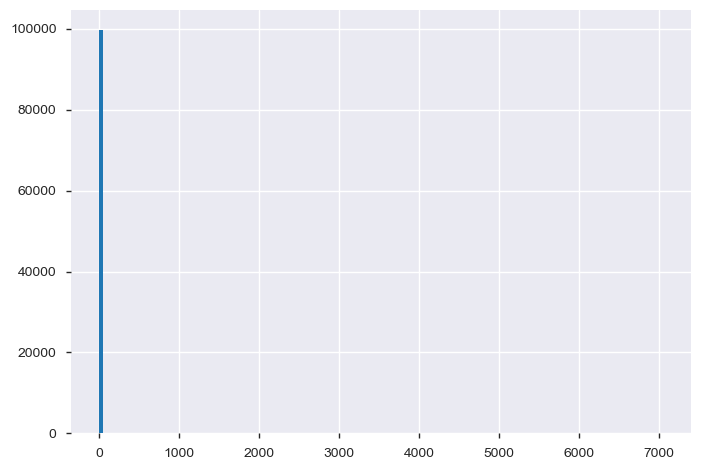

In [14]:
data['distance_to_user'].hist(bins = 150)

In [15]:
# удалим странные строки в которых расстояние до клиента > 10км

data = data[data['distance_to_user'] < 10]

In [16]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_to_user
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,1.363045
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,3.413092
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,0.409999
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,0.647472
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,1.062481


In [17]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(data[data.columns.difference(['offer_class_group', 'ride_type_desc'])].corr(),
#             cbar=True,
#             annot=True)

In [18]:
# удалим сильно коррелирующие столбцы

data.drop(['origin_order_longitude','origin_order_latitude','duration_min'],\
           axis = 1, inplace=True)

In [19]:
# идентификатор заказа и оффера врят ли о чем то говорит, удалим их тоже

data.drop(['offer_gk','order_gk'],\
           axis = 1, inplace=True)

In [20]:
data.head()

,weekday_key,hour_key,driver_gk,driver_latitude,driver_longitude,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_user
0,5,20,6080,55.818842,37.334562,-1.000,Economy,private,0,1.363045
1,5,14,6080,55.805342,37.515023,18.802,Standard,private,1,3.413092
2,6,14,6080,55.813978,37.347688,6.747,Economy,private,0,0.409999
3,2,6,6080,55.745922,37.421748,-1.000,Economy,private,1,0.647472
4,4,16,6080,55.803578,37.521602,12.383,Economy,private,1,1.062481


In [21]:
# high dem - добавим флаг высокого спроса и удалим время и день недели
data['high_dem'] = 0

data.loc[ (data['weekday_key'].isin([5,6,0])) & (data['hour_key'] >= 17), 'high_dem'] = 1

data.drop(['weekday_key','hour_key'],\
         axis = 1, inplace=True)

data.head()

,driver_gk,driver_latitude,driver_longitude,distance_km,offer_class_group,ride_type_desc,driver_response,distance_to_user,high_dem
0,6080,55.818842,37.334562,-1.000,Economy,private,0,1.363045,1
1,6080,55.805342,37.515023,18.802,Standard,private,1,3.413092,0
2,6080,55.813978,37.347688,6.747,Economy,private,0,0.409999,0
3,6080,55.745922,37.421748,-1.000,Economy,private,1,0.647472,0
4,6080,55.803578,37.521602,12.383,Economy,private,1,1.062481,0


In [22]:
# отделим поездки эконом и другие поездки класса выше

data['Economy'] = data['offer_class_group']\
    .map({'Economy':1})\
    .fillna(0)

data.drop(['offer_class_group'], axis = 1, inplace=True)
data.head()

,driver_gk,driver_latitude,driver_longitude,distance_km,ride_type_desc,driver_response,distance_to_user,high_dem,Economy
0,6080,55.818842,37.334562,-1.000,private,0,1.363045,1,1.0
1,6080,55.805342,37.515023,18.802,private,1,3.413092,0,0.0
2,6080,55.813978,37.347688,6.747,private,0,0.409999,0,1.0
3,6080,55.745922,37.421748,-1.000,private,1,0.647472,0,1.0
4,6080,55.803578,37.521602,12.383,private,1,1.062481,0,1.0


In [23]:
# private ride 

data['is_private_ride'] = data['ride_type_desc']\
    .map({'private':1})\
    .fillna(0)

data.drop('ride_type_desc', axis =1, inplace=True)
data.head()

,driver_gk,driver_latitude,driver_longitude,distance_km,driver_response,distance_to_user,high_dem,Economy,is_private_ride
0,6080,55.818842,37.334562,-1.000,0,1.363045,1,1.0,1.0
1,6080,55.805342,37.515023,18.802,1,3.413092,0,0.0,1.0
2,6080,55.813978,37.347688,6.747,0,0.409999,0,1.0,1.0
3,6080,55.745922,37.421748,-1.000,1,0.647472,0,1.0,1.0
4,6080,55.803578,37.521602,12.383,1,1.062481,0,1.0,1.0


Обучим модель и посмотрим что получилось

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = data[data.columns.difference(['driver_response'])] 

# X = data[['distance_to_user','Economy','distance_km','origin_order_latitude','origin_order_longitude','driver_gk']]
y = data['driver_response']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [26]:
X_train.head()

,Economy,distance_km,distance_to_user,driver_gk,driver_latitude,driver_longitude,high_dem,is_private_ride
24085,1.0,8.550,0.000111,2236,55.962323,37.407117,0,1.0
2656,1.0,17.428,0.580074,6792,55.746640,37.631598,0,1.0
19110,1.0,-1.000,1.866481,2221,55.653950,37.481235,0,1.0
49127,1.0,68.869,0.531825,211,55.414607,37.898762,1,1.0
73439,0.0,-1.000,0.645890,462,55.962103,37.417487,1,0.0


In [27]:
X_test.head()

,Economy,distance_km,distance_to_user,driver_gk,driver_latitude,driver_longitude,high_dem,is_private_ride
45673,0.0,23.922,2.447091,199,55.923483,37.394522,1,1.0
63589,1.0,6.082,0.615066,3400,55.908899,37.541115,0,1.0
89310,0.0,31.202,0.491611,1358,55.964893,37.413543,0,1.0
28487,1.0,22.894,0.051486,1060,55.961859,37.407126,0,1.0
9479,1.0,14.797,0.794489,1835,55.755077,37.657043,0,1.0


In [28]:
y_train.head()

24085    0
2656     0
19110    1
49127    0
73439    0
Name: driver_response, dtype: int64

In [29]:
y_test.head()

45673    1
63589    1
89310    0
28487    0
9479     0
Name: driver_response, dtype: int64

In [30]:
clf = RandomForestClassifier(random_state=0, n_estimators = 10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score


# print(mean_squared_error(y_test, y_pred)**0.5)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


pd.Series(y_test).value_counts()

[[7792 2182]
 [2159 7798]]
0.7821985851186594


0    9974
1    9957
Name: driver_response, dtype: int64

In [159]:
# %%time
# data['with_end_point'] = 1
# data.loc[ data['distance_km'] == -1, 'with_end_point'] = 0
# data['offer_class_group'] = data['offer_class_group']\
#     .map({'Economy':'Economy','Standard':'Standard', 'Delivery':'Delivery',\
#          'Kids':'Kids','XL':'XL'})\
#     .fillna('premiium_or_more')

# data.head()

In [153]:
# data.drop(['origin_order_longitude','origin_order_latitude',\
#            'driver_latitude','driver_longitude'],\
#            axis = 1, inplace=True)

In [154]:
# data.drop(['driver_gk','order_gk','offer_gk'],\
#            axis = 1, inplace=True)

In [158]:
# data['with_end_point'] = data['distance_km']\
#     .map(lambda x: 0 if x == -1 else 1)

# data.head()

In [160]:
# profile = ProfileReport(data)
# profile

In [164]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(data.corr(),
#             cbar=True,
#             annot=True)

In [165]:
# data.drop(['duration_min'],\
#            axis = 1, inplace=True)

In [166]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(data.corr(),
#             cbar=True,
#             annot=True)

In [497]:
# data[data['offer_class_group'] == 'XL'].head()

In [521]:
# # offer_class_group


# data['offer_class_group'] = data['offer_class_group']\
#     .map({'Economy':'Economy','Standard':'Standard', 'Delivery':'Delivery',\
#          'Kids':'Kids','XL':'XL'})\
#     .fillna('premium_or_more')

# data.head()

In [526]:
# from sklearn import preprocessing
# offer_class_group = data['offer_class_group'].get_values().reshape(-1, 1)

# # One-hot encoding
# oh_encoder = preprocessing.OneHotEncoder()
# oh_encoder.fit(offer_class_group)
# oh_result = oh_encoder.transform(offer_class_group).toarray()


In [527]:
# name = ['Delivery','Economy','Kids','Standard','XL','premium_or_more']

In [528]:
# tmp = pd.DataFrame(oh_result, columns=name)
# tmp.index = data.index

In [529]:
# data = pd.concat([data, tmp], axis=1)
# data.drop(['offer_class_group'], axis=1, inplace = True)

In [32]:
# from sklearn import preprocessing
# is_private_ride = data['is_private_ride'].get_values().reshape(-1, 1)

# # One-hot encoding
# oh_encoder = preprocessing.OneHotEncoder()
# oh_encoder.fit(is_private_ride)
# oh_result = oh_encoder.transform(is_private_ride).toarray()
# oh_result

In [183]:
# name = ['business','private']

In [184]:
# tmp = pd.DataFrame(oh_result, columns=name)
# tmp.index = data.index

In [185]:
# data = pd.concat([data, tmp], axis=1)
# data.drop(['is_private_ride'], axis=1, inplace = True)

In [186]:
# profile = ProfileReport(data)
# profile